In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

 Now the code begins

In [5]:
import os
path = os.getcwd() + '\data\ex1data1.txt'
data = pd.read_csv(path,header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


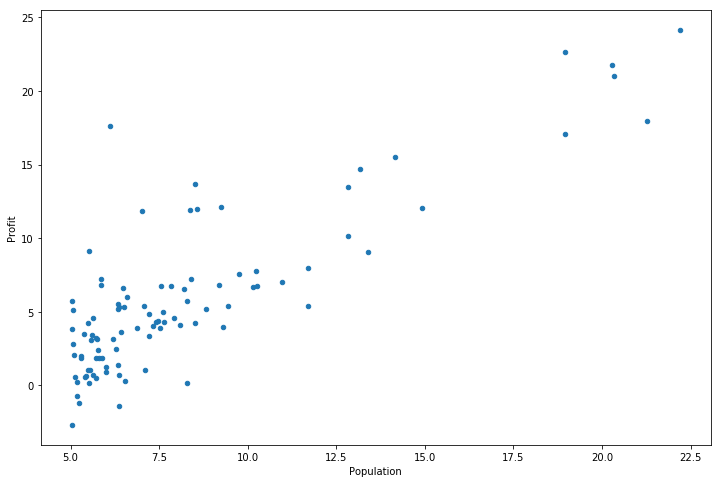

In [9]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))

In [27]:
def compute_cost(X,y,theta):
    inner = np.power(((X*theta.T)-y),2)  # theata.T is transpose of theta numpy matrix
    return np.sum(inner)/(2*len(X))

In [11]:
data.insert(0,'Ones',1)

In [12]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [13]:
cols = data.shape[1]

In [18]:
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.matrix(np.array([0,0]))

In [19]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [20]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


    Now convert dataframes into numpy matrices

In [22]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [24]:
theta

matrix([[0, 0]])

lets look into shapes before matrix computation

In [25]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

Finally we are going to compute the cost function

In [28]:
compute_cost(X,y,theta)

32.072733877455676

Lets now implement our gradient descent function

The idea with gradient descent is that for each iteration, we compute the gradient of the error term in order to figure out the appropriate direction to move our parameter vector. In other words, we're calculating the changes to make to our parameters in order to reduce the error, thus bringing our solution closer to the optimal solution (i.e best fit).

In [44]:
def gradient_descent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    no_of_theta = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        h = (X * theta.T) - y
        for j in range(no_of_theta):
            term = np.multiply(h , X[:,j])
            temp[0,j] = theta[0,j] - (alpha/len(X)) * np.sum(term)
        theta = temp
        cost[i] = compute_cost(X,y,theta)
    
    return theta,cost

Once again we're relying on numpy and linear algebra for our solution. You may notice that my implementation is not 100% optimal. In particular, there's a way to get rid of that inner loop and update all of the parameters at once. 

Now that we've got a way to evaluate solutions, and a way to find a good solution, it's time to apply this to our data set.

In [45]:
iters = 1000
alpha = 0.01

g, cost = gradient_descent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [46]:
compute_cost(X,y,g)

4.5159555030789136

That's certainly a lot better than 32, but it's not a very intuitive way to look at it.

Now let's plot the linear model along with the data to visually see how well it fits.

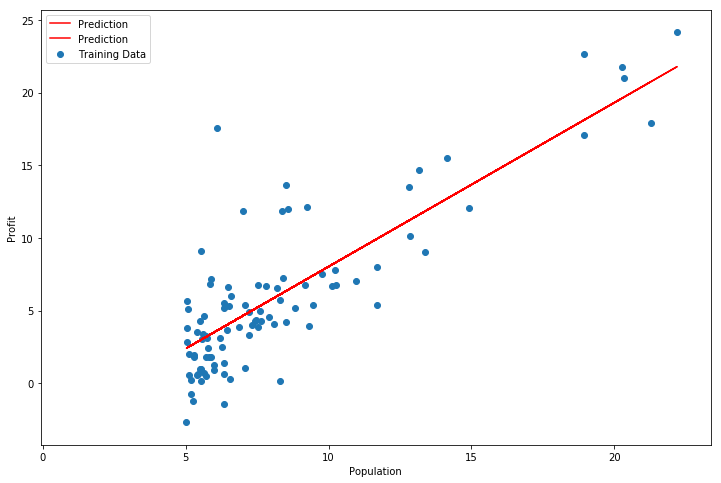

In [64]:
np.linspace(data.Population.min(),data.Population.max(),100)
func = g[0,0] + (g[0,1]*X)
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(X,func,'r',label='Prediction')  # r is color of the label in the plot
ax.scatter(data.Population,data.Profit,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')

Looks pretty good! Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well. Notice that the cost always decreases - this is an example of a convex optimization problem.

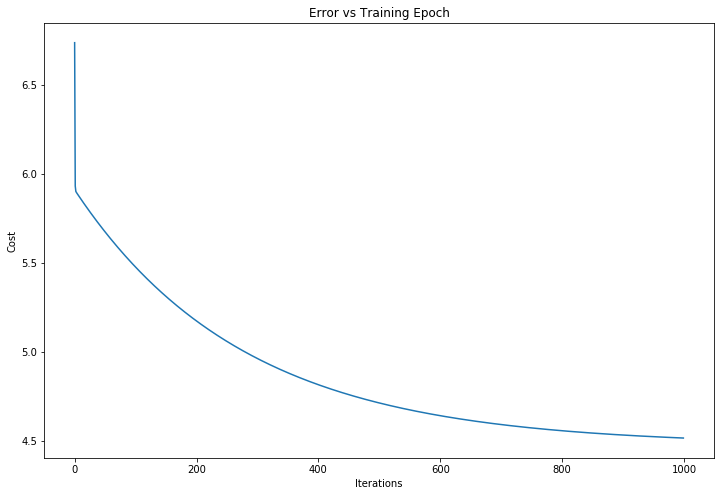

In [67]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')